<a href="https://colab.research.google.com/github/ali3006/Ali-akbar-Gholami.-project-1/blob/main/Ali_Akbar_Gholami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install keras
!pip install nltk
!pip install hazm
!pip install stopwords_guilannlp
!pip install -U -q PyDrive


In [21]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
from hazm import *
from stopwords_guilannlp import *
from nltk.tokenize import RegexpTokenizer
import numpy as np
import math
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
from string import punctuation
import random
    
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [22]:
#train_set = pd.read_csv('trainset.csv')
#valid_set = pd.read_csv('validationset.csv')

dataa = pd.read_excel('/content/Com&Imo-DigiKala_Record AliAkbar Gholami.xlsx')
dataa=dataa[['comment','Label']]
l=int(len(dataa)*0.8)
train_set=dataa[:l]
valid_set = dataa[l:]

In [23]:
valid_set

,comment,Label
1600,من به شما اطمینان می دهم که بوش میره ولی باید ...,U0001F47E
1601,ولی این جارو همه توقعات یک کاربر به نحو عالی ب...,U0001F923
1602,تو این رنج قیمت خوبه دیگه چقد مگه هزینه کردیم ...,U0001F608
1603,عزیزانی که این محصول رو استفاده کردن نمیتونن ا...,U0001F61A
1604,سید مهدی شجاعی متولد شهریور 1339 در تهران، داس...,U0001F608
1605,توصیه میکنم دوستان پیش از خرید از اینکه این آن...,U0001F923
1606,خب انتطارداشتم حبابهایی ظریف و ترد باشه ولیک...,U0001F61A
1607,با وجود اینکه توسط فرد مجرب نصب شده بعد از چند...,U0001F61A
1608,من سال پیش نسل قبل اینو گرفتم(S8) ولی اصلا راض...,U0001F914
1609,با سلام\nبعد از بررسی و تحقیق 2 ماهه بین تلویز...,U0001F608


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
print(train_set.head(10))

                                             comment      Label
0  بعد دوهفته دیگه روشن نشد بردم گارانتی یکی دیگه...  U0001F914
1  من حدودا دوماهی می شه این لب تاب رو خریدم....ا...  U0001F61A
2  لامپهای دلتا نسبت به واتشون نور کمتری دارن.قبل...  U0001F974
3     نسبت به هزینه ای که کردم کاملا راضی کننده است.  U0001F61A
4  بند ساعت من با دو سه نوبت دست کردن که چند ساعت...  U0001F974
5  واقعا دیگه زییییاد این قیمت برای این مدل ایفون...  U0001F61A
6  سلام من این پک شامپو رو استفاده کردم بااینکه ب...  U0001F641
7       در یک کلام عالی و فقط مناسب هارد 2/5اینچی هس  U0001F61A
8            محصول خوبی هست از دیجی کالا گرفتم عالیه  U0001F923
9  این دستگاه از نظر زیبایی واقعا عالی هست، \nولی...  U0001F61A


In [26]:


train_len = train_set.shape[0]
valid_len = valid_set.shape[0]
print('Train set has {} rows.'.format(train_len))
print('Validation set has {} rows.'.format(valid_len))



Train set has 1600 rows.
Validation set has 400 rows.


In [27]:
cat1 = train_set["Label"]



#Test set = Valid set
test_cat1 = valid_set["Label"]



unique_cat1 = np.unique(cat1)

#in the following lines of code we print how many posts are in each category
cat1_posts_count = dict.fromkeys(unique_cat1, 0)
for cat in cat1:
  cat1_posts_count[cat] += 1

for cat, cnt in cat1_posts_count.items():
  print('Category "{}" contains {} posts.'.format(cat, cnt))

Category "U0001F47E" contains 184 posts.
Category "U0001F608" contains 176 posts.
Category "U0001F60C" contains 80 posts.
Category "U0001F61A" contains 315 posts.
Category "U0001F62D" contains 26 posts.
Category "U0001F63F" contains 35 posts.
Category "U0001F641" contains 185 posts.
Category "U0001F914" contains 130 posts.
Category "U0001F923" contains 420 posts.
Category "U0001F974" contains 49 posts.


In [28]:
#for faster result, we define the following lines of code outside the 'preprocessing' function
normalizer = Normalizer()
stopwords = stopwords_output("Persian", "nar")
lemmatizer = Lemmatizer()
stemmer = Stemmer()


def preprocessing(text):
    
    text = re.sub('<[^<]+?>','', text)
    text = ''.join(c for c in text if not c.isdigit())
    text = ''.join(c for c in text if c not in punctuation)
    text = normalizer.normalize(text)
    text = ' '.join(word for word in text.split() if word not in stopwords) # remove stopwors from text
    return text

In [29]:
column1 = "comment"

dataset = train_set.append(valid_set)
dataset[column1] = dataset[column1].apply(preprocessing)
num_classes = len(unique_cat1)



# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each post.
MAX_SEQUENCE_LENGTH = 250
# The embedding dimension
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dataset[column1].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(word_index)

X = tokenizer.texts_to_sequences(dataset[column1].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Found 9562 unique tokens.
Shape of data tensor: (2000, 250)


In [30]:
rows_of_train = len(train_set)
rows_of_test = len(valid_set)

Y = pd.get_dummies(dataset['Label']).values
print('Shape of label tensor:', Y.shape)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state = 42)

X_train = X[0:rows_of_train]
X_test = X[rows_of_train: rows_of_train + rows_of_test]

Y_train = Y[0:rows_of_train]
Y_test = Y[rows_of_train:rows_of_train + rows_of_test]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of label tensor: (2000, 10)
(1600, 250) (1600, 10)
(400, 250) (400, 10)


In [31]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 5,081,410
Trainable params: 5,081,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
23/23 [==============================] - 20s 729ms/step - loss: 2.2317 - accuracy: 0.2321 - val_loss: 2.1088 - val_accuracy: 0.2250
Epoch 2/5
23/23 [==============================] - 16s 679ms/step - loss: 2.0043 - accuracy: 0.2815 

In [32]:
#X_test.reshape

In [33]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.25      0.02      0.04        53
           2       0.00      0.00      0.00        14
           3       0.28      0.23      0.25        81
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         7
           6       0.18      0.53      0.26        34
           7       0.00      0.00      0.00        33
           8       0.37      0.74      0.50       114
           9       0.00      0.00      0.00        12

    accuracy                           0.30       400
   macro avg       0.11      0.15      0.10       400
weighted avg       0.21      0.30      0.22       400

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 6. 15.  4. 19.  1.  2.  3.  2. 16.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 

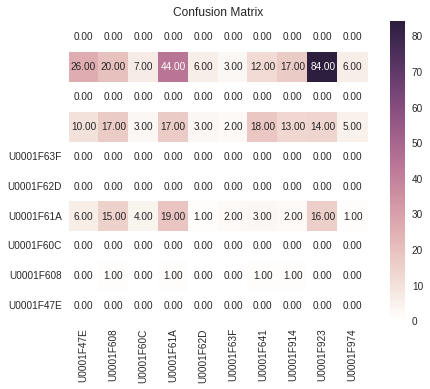

In [34]:
new_Y_pred = np.argmax(Y_pred, axis=1)
new_Y_test = np.argmax(Y_test, axis=1)

print(classification_report(new_Y_test, new_Y_pred))

mpl.style.use('seaborn')

conf_arr = np.zeros((num_classes, num_classes))

for i in range(len(new_Y_pred)):
        conf_arr[new_Y_pred[i]][new_Y_test[i]] += 1

print(conf_arr)

summ = conf_arr.sum()

df_cm = pd.DataFrame(conf_arr, 
  index = unique_cat1,
  columns = unique_cat1)

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)

res = sb.heatmap(df_cm, annot=True, vmin=0.0, vmax=np.max(conf_arr), fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5], unique_cat1,va='center')

print('\n\n')

plt.title('Confusion Matrix')

plt.savefig('confusion_matrix.png', dpi=700, bbox_inches='tight' )

plt.show()

In [35]:
# Compute the accuracy of training data and validation data

corrects = 0
for i in range(len(new_Y_pred)):
    if int(new_Y_pred[i]) is int(new_Y_test[i]):
        corrects += 1
        
accuracy = float(corrects / len(new_Y_pred))*100
print('Accuracy (using "{}" column): {} %'.format (column1, accuracy))

accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Accuracy (using "comment" column): 30.5 %
13/13 [==============================] - 1s 62ms/step - loss: 1.9128 - accuracy: 0.3050
Test set
  Loss: 1.913
  Accuracy: 0.305


In [36]:
#Similar to the binary case, we can define precision for each of the classes
precision = []
#we append the precision for each class to the variable 'precision'
for i in range(num_classes):
  precision.append(conf_arr[i][i] / np.sum(conf_arr[i], axis = 0))

print('Precisions per classes are : {}'.format(precision))

macro_precision = 100 * np.sum(precision) / num_classes

print('Macro averaged Precision is : {} %'.format(macro_precision))

weighted_precision = 0
total = 0
for i in range(num_classes):
  weighted_precision += np.sum(conf_arr, axis = 0)[i] * precision[i]
  total += np.sum(conf_arr, axis = 0)[i]

weighted_precision = 100 * weighted_precision / total
print('Weighted Precision is : {} %'.format(weighted_precision))

Precisions per classes are : [nan, 0.25, nan, 0.2753623188405797, nan, nan, 0.17647058823529413, nan, 0.37333333333333335, nan]
Macro averaged Precision is : nan %
Weighted Precision is : nan %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [37]:


#Similar to the binary case, we can define recall for each of the classes
recall = []
#We append the recall for each class to the variable 'recall'
for i in range(num_classes):
  recall.append(conf_arr[i][i] / np.sum(conf_arr, axis = 0)[i])
  
print('Recalls per classes are : {}'.format(recall))

macro_recall = 100 * np.sum(recall) / num_classes
print('Macro averaged Recall is : {} %'.format(macro_recall))

weighted_recall = 0
for i in range(num_classes):
  weighted_recall += np.sum(conf_arr, axis = 0)[i] * recall[i]

weighted_recall = 100 * weighted_recall / total
print('Weighted Recall is : {} %'.format(weighted_recall))



Recalls per classes are : [0.0, 0.018867924528301886, 0.0, 0.2345679012345679, 0.0, 0.0, 0.5294117647058824, 0.0, 0.7368421052631579, 0.0]
Macro averaged Recall is : 15.196896957319101 %
Weighted Recall is : 30.5 %


In [38]:
#F1-score is a function of precision and recall
#we can now compute the per-class F1-score
f1_score = []
for i in range(num_classes):
  f1_score.append( 2*( (recall[i]*precision[i]) / (recall[i]+precision[i])))

print('F1-scores per classes are : {}'.format(f1_score))

macro_f1 = 100 * np.sum(f1_score) / num_classes

print('Macro averaged F1-score is : {} %'.format(macro_f1))

weighted_f1 = 0
for i in range(num_classes):
  weighted_f1 += np.sum(conf_arr, axis = 0)[i] * f1_score[i]

weighted_f1 = 100 * weighted_f1 / total
print('Weighted F1-score is : {} %'.format(weighted_f1))

F1-scores per classes are : [nan, 0.03508771929824561, nan, 0.2533333333333333, nan, nan, 0.2647058823529412, nan, 0.49557522123893805, nan]
Macro averaged F1-score is : nan %
Weighted F1-score is : nan %
